# Logistic regeression model

In [1]:
#importing the necessary EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#traintestsplit import
from sklearn.model_selection import train_test_split
#libraries for scaling
from sklearn.preprocessing import StandardScaler
#RFE library
from sklearn.feature_selection import RFE
#logistic regression 
from sklearn.linear_model import LogisticRegression
#importing statmodels since it gives better summaries
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#importing the dataset
leads= pd.read_csv("Leads.csv")

### Exploring the data

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads["Asymmetrique Activity Index"].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [10]:
leads["Asymmetrique Activity Score"].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [11]:
leads["Asymmetrique Profile Index"].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [12]:
leads["Asymmetrique Profile Score"].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [13]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
#number o nan values by columns
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
#unique values in Lead Quality
leads["Lead Quality"].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [16]:
leads["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [17]:
#percentage of nan values in a dataset
(leads.isna().sum()/len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Dropping the columns with more than 40%null values 

In [18]:
leads.drop("Asymmetrique Activity Index", axis= 1, inplace= True)

In [19]:
leads.drop(["Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis= 1, inplace= True)

In [20]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [21]:
leads.drop("Lead Quality", axis= 1, inplace= True)

In [22]:
leads.isna().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Imputing the values into the columns with high percentage of nan values

In [23]:
leads["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [24]:
leads["Country"].value_counts(normalize= True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [25]:
#since most values are from India we will replace the nan values with India 
leads["Country"]= leads["Country"].fillna("India")

In [26]:
leads.isna().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [27]:
leads["Specialization"].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [28]:
leads["Specialization"].value_counts(normalize= True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [29]:
leads["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
7802-1942

5860

In [31]:
leads["Specialization"]= leads["Specialization"].fillna("Unknown")
leads["Specialization"]= leads["Specialization"].replace("Select", "Unknown")

In [32]:
leads.isna().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [33]:
leads.Specialization.unique()

array(['Unknown', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [34]:
leads["City"].describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [35]:
leads["City"].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [36]:
leads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [37]:
leads["City"]= leads["City"].replace("Select", "Unknown")

In [38]:
leads["City"]= leads["City"].fillna("Mumbai")

In [39]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [40]:
leads["Tags"].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [41]:
leads["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [42]:
leads.drop("Tags", axis= 1, inplace= True)

In [43]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [44]:
leads["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [45]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
leads.drop("What matters most to you in choosing a course", axis= 1 , inplace= True)

In [47]:
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [48]:
leads["What is your current occupation"].fillna("Unemployed" , inplace= True)

In [49]:
leads.isna().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                        0
Specialization                                 0
How did you hear about X Education          2207
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [50]:
leads["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [51]:
leads["Lead Profile"].replace("Select", "Unknown", inplace= True)

In [52]:
leads["Lead Profile"].fillna("Unknown", inplace= True)

In [53]:
leads.isna().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                        0
Specialization                                 0
How did you hear about X Education          2207
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisemen

In [54]:
leads["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [55]:
leads["How did you hear about X Education"].replace("Select","Unknown", inplace= True)

In [56]:
leads["How did you hear about X Education"].fillna("Unknown", inplace= True)

In [57]:
leads.isna().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Country                                       0
Specialization                                0
How did you hear about X Education            0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                   

In [58]:
leads["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [59]:
leads.drop("Last Activity", inplace= True, axis= 1)

In [60]:
leads.isna().sum()/len(leads)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Country                                     0.000000
Specialization                              0.000000
How did you hear about X Education          0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

In [61]:
#len(leads["Page Views Per Visit"].unique())

In [62]:
#leads.drop("Page Views Per Visit",inplace= True, axis= 1)

In [63]:
#leads.drop("TotalVisits", inplace= True, axis= 1)

In [64]:
leads.isna().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Country                                       0
Specialization                                0
How did you hear about X Education            0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

In [65]:
leads.dropna(inplace= True)

In [66]:
leads.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Country                                     0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

### Univaritate and Bivariate analysis

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

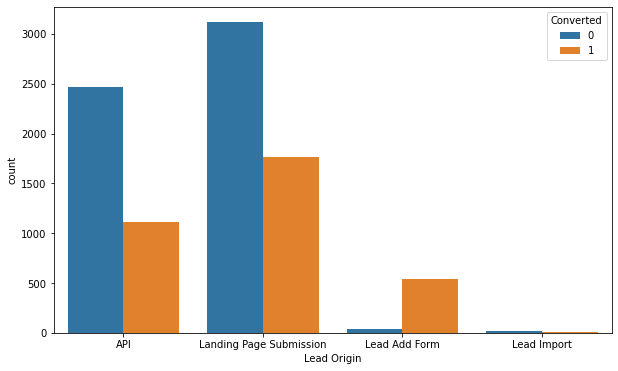

In [67]:
plt.rcParams["figure.figsize"]= (10,6)
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)

<AxesSubplot:xlabel='Do Not Email', ylabel='count'>

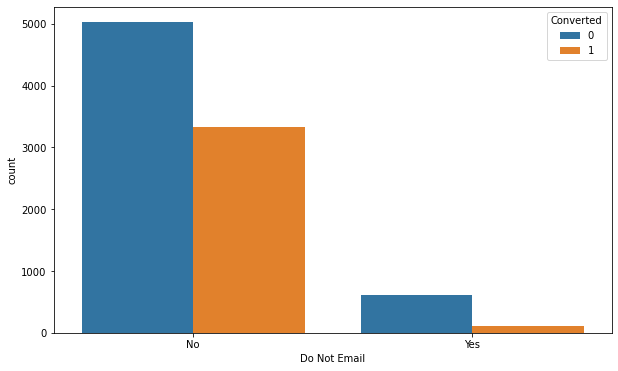

In [68]:
sns.countplot(x= "Do Not Email", hue= "Converted", data= leads)

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

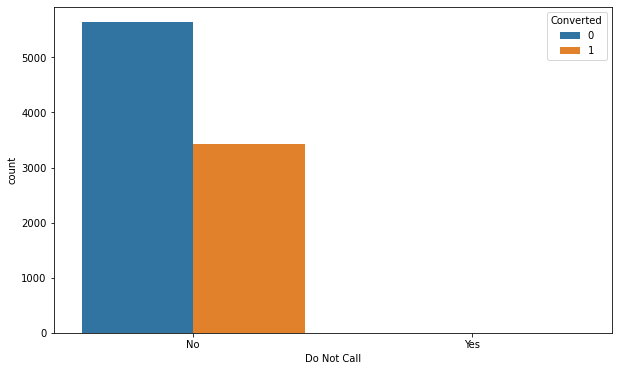

In [69]:
sns.countplot(x= "Do Not Call", hue= "Converted", data= leads)

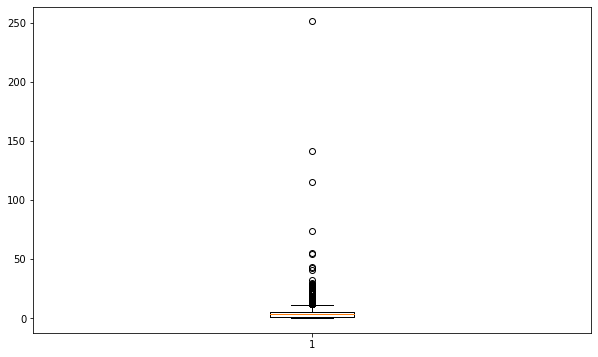

In [70]:
plt.boxplot(leads["TotalVisits"])
plt.show()

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

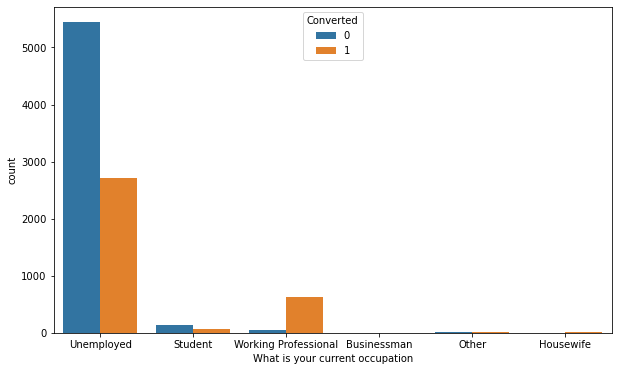

In [71]:
sns.countplot(x= "What is your current occupation", hue= "Converted", data= leads)

<AxesSubplot:xlabel='Newspaper Article', ylabel='count'>

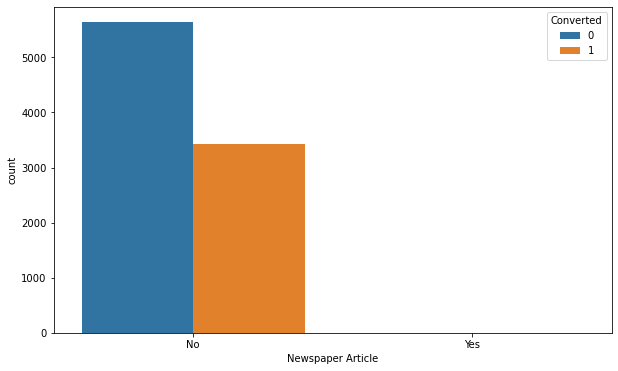

In [72]:
sns.countplot(x= "Newspaper Article", hue= "Converted", data= leads)

<AxesSubplot:xlabel='Magazine', ylabel='count'>

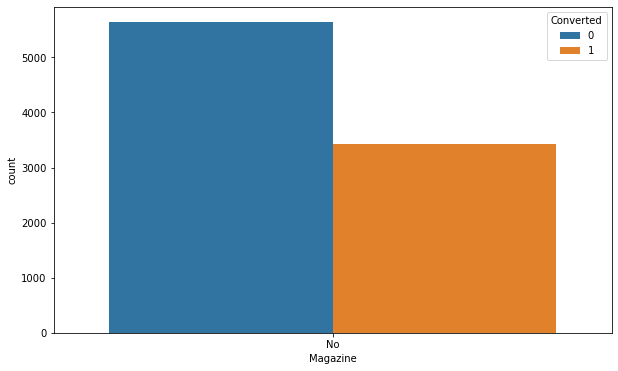

In [73]:
sns.countplot(x= "Magazine", hue= "Converted", data= leads)

<AxesSubplot:xlabel='Newspaper', ylabel='count'>

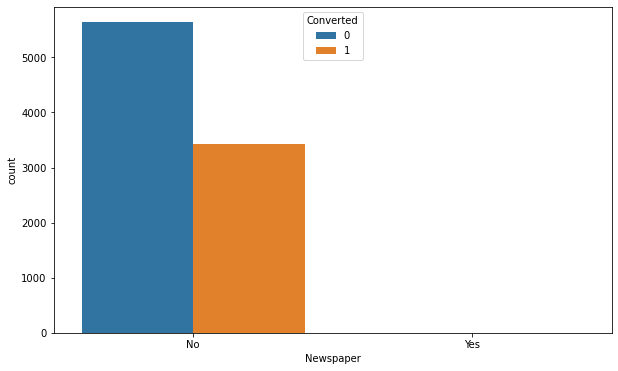

In [74]:
sns.countplot(x= "Newspaper", hue= "Converted", data= leads)

<AxesSubplot:xlabel='X Education Forums', ylabel='count'>

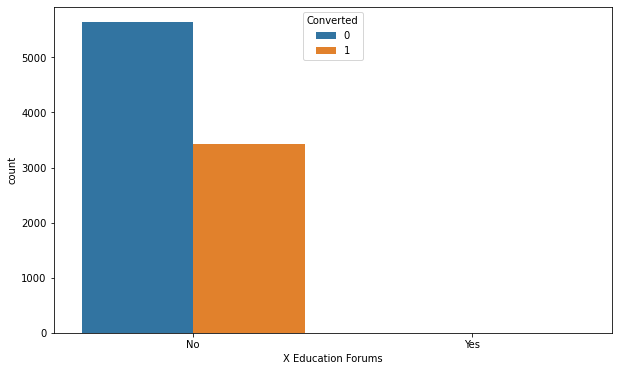

In [75]:
sns.countplot(x= "X Education Forums", hue= "Converted", data= leads)

<AxesSubplot:xlabel='Digital Advertisement', ylabel='count'>

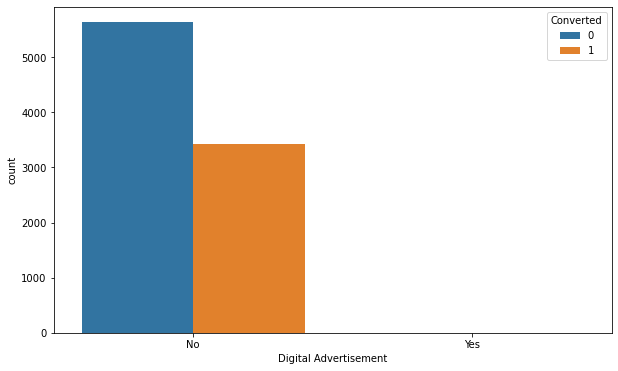

In [76]:
sns.countplot(x= "Digital Advertisement", hue= "Converted", data= leads)

<AxesSubplot:xlabel='Through Recommendations', ylabel='count'>

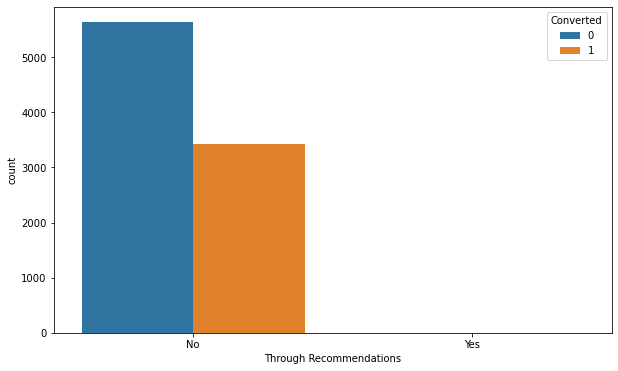

In [77]:
sns.countplot(x= "Through Recommendations", hue= "Converted", data= leads)

<AxesSubplot:xlabel='Receive More Updates About Our Courses', ylabel='count'>

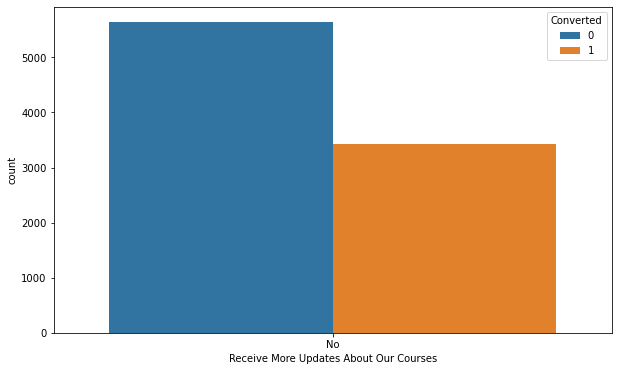

In [78]:
sns.countplot(x= "Receive More Updates About Our Courses", hue= "Converted", data= leads)

In [79]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

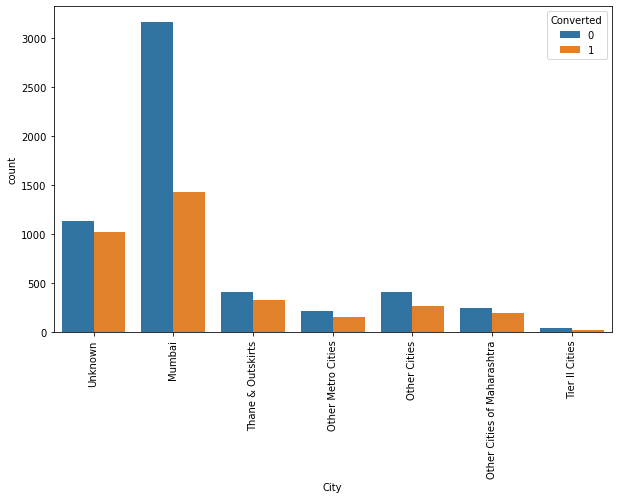

In [80]:
sns.countplot(x= "City", hue= "Converted", data= leads)
plt.xticks(rotation= 90)
plt.show()

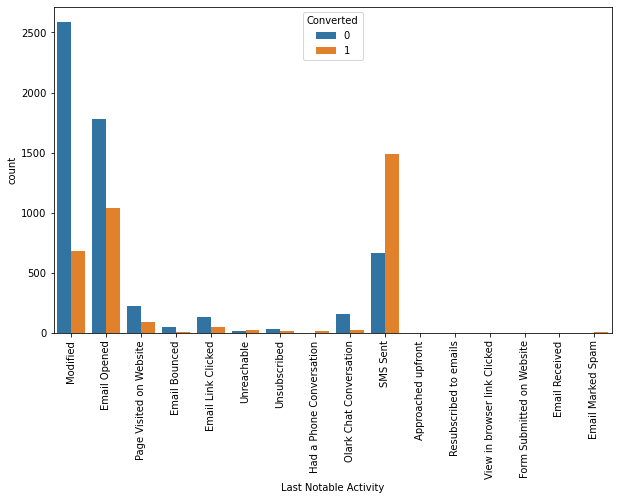

In [81]:
sns.countplot(x= "Last Notable Activity", hue= "Converted", data= leads)
plt.xticks(rotation= 90)
plt.show()

## Data Preparation for Model Building 

In [82]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Unknown,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Unknown,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified


In [83]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [84]:
leads["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [85]:
leads["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [86]:
leads["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [87]:
leads["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [88]:
leads["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [89]:
leads["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [90]:
leads["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [91]:
leads["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [92]:
leads["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [93]:
leads["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [94]:
leads["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [95]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Unknown,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Unknown,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified


In [96]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [97]:
#maping the binary columns to 1/0
leads[["Do Not Call", "Do Not Email", "Newspaper", "Newspaper Article","Magazine", "Update me on Supply Chain Content", "I agree to pay the amount through cheque","A free copy of Mastering The Interview", "Get updates on DM Content", "Receive More Updates About Our Courses", "Search", "Digital Advertisement", "Through Recommendations", "X Education Forums"]].replace({"Yes": 1, "No": 0}, inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [98]:
leads["Do Not Email"].replace({"Yes":1, "No":0}, inplace= True)

In [99]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,No,0,0.0,0,0.0,...,No,No,No,No,No,Unknown,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,No,0,5.0,674,2.5,...,No,No,No,No,No,Unknown,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,No,0,1.0,305,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,No,1,2.0,1428,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified


In [100]:
leads["Do Not Call"].replace({"Yes":1, "No":0}, inplace= True)

In [101]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,No,No,No,No,No,Unknown,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,No,No,No,No,No,Unknown,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified


In [102]:
leads["Newspaper"].replace({"Yes":1, "No":0}, inplace= True)

In [103]:
leads.Newspaper

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Name: Newspaper, Length: 9074, dtype: int64

In [104]:
leads["Newspaper Article"].replace({"Yes":1, "No":0}, inplace= True)

In [105]:
leads["Magazine"].replace({"Yes":1, "No":0}, inplace= True)

In [106]:
leads["Update me on Supply Chain Content"].replace({"Yes":1, "No":0}, inplace= True)

In [107]:
leads["I agree to pay the amount through cheque"].replace({"Yes":1, "No":0}, inplace= True)

In [108]:
leads["A free copy of Mastering The Interview"].replace({"Yes":1, "No":0}, inplace= True)

In [109]:
leads["Get updates on DM Content"].replace({"Yes":1, "No":0}, inplace= True)

In [110]:
leads["Receive More Updates About Our Courses"].replace({"Yes":1, "No":0}, inplace= True)

In [111]:
leads["Search"].replace({"Yes":1, "No":0}, inplace= True)

In [112]:
leads["Digital Advertisement"].replace({"Yes":1, "No":0}, inplace= True)

In [113]:
leads["Through Recommendations"].replace({"Yes":1, "No":0}, inplace= True)

In [114]:
leads["X Education Forums"].replace({"Yes":1, "No":0}, inplace= True)

In [115]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,Unknown,Unknown,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,Unknown,Unknown,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,Unknown,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,Unknown,Mumbai,0,0,Modified


Features that had a yes or no answer have been succesfully converted to 1/0 format

#### Now its time to address the categorical variables 

In [116]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [117]:
leads_dummies= pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City','Last Notable Activity']],drop_first= True)
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
#mergeing the two dataframes
leads= pd.concat([leads, leads_dummies], axis= 1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [119]:
leads.shape

(9074, 96)

In [120]:
leads.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis= 1, inplace= True)

In [121]:
leads.shape

(9074, 90)

### Train test split

In [122]:
X=leads.drop("Converted", axis= 1)

In [123]:
y= leads.Converted
y.head

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64>

In [124]:
#splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size= 0.7, random_state= 100)

In [125]:
X_train.shape

(6351, 89)

In [126]:
X_train.drop("Prospect ID", inplace= True, axis= 1)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [127]:
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,630949,0,0,2.0,397,2.0,India,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,649355,1,0,2.0,190,2.0,India,Unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,579735,0,0,0.0,0,0.0,India,Unknown,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,614238,0,0,2.0,1380,2.0,India,Multiple Sources,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,588625,0,0,5.0,1584,2.5,India,Word Of Mouth,0,0,...,0,0,1,0,0,0,0,0,0,0


In [128]:
X_train.drop("Lead Number", axis= 1, inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [129]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2.0,397,2.0,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.0,India,Unknown,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,2.0,1380,2.0,India,Multiple Sources,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,5.0,1584,2.5,India,Word Of Mouth,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [130]:
X_test.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652,0,0,4.0,157,4.0,India,Unknown,0,...,0,0,0,0,0,0,0,0,0,0
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500,0,0,5.0,1513,5.0,India,Unknown,0,...,0,0,0,0,0,0,0,0,0,0
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935,0,0,2.0,74,2.0,India,Unknown,0,...,0,0,0,0,0,0,0,0,0,0
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437,0,0,0.0,0,0.0,India,Unknown,0,...,0,0,1,0,0,0,0,0,0,0
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,623381,0,0,8.0,164,8.0,India,Unknown,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
X_test.drop(["Prospect ID", "Lead Number"], axis= 1, inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [132]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,4.0,157,4.0,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,5.0,1513,5.0,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,2.0,74,2.0,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,0.0,0,0.0,India,Unknown,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,8.0,164,8.0,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
y_train.shape

(6351,)

In [134]:
y_test.shape

(2723,)

### Feature Scaling

In [135]:
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'How did you hear about X Education', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead S

In [136]:
#scaling the variables
scaler= StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

D:\anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [137]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,-3.668141e-16,2.774246e-16,-3.059538e-16,0.001575,0.0,0.000315,0.000157,0.000157,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.269581,0.017744,1.000079e+00,1.000079e+00,1.000079e+00,0.039653,0.0,0.017744,0.012548,0.012548,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,-6.713838e-01,-8.886503e-01,-1.132538e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-4.779894e-01,-8.703028e-01,-6.561023e-01,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-9.120076e-02,-4.354671e-01,-1.796662e-01,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.955879e-01,8.002366e-01,4.539939e-01,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,4.787059e+01,3.195502e+00,1.030193e+01,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,India,Unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,India,Unknown,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,India,Multiple Sources,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,India,Word Of Mouth,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [139]:
X_train.drop("Country", axis=1, inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [140]:
X_train.drop("How did you hear about X Education", inplace= True , axis= 1)

In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   Do Not Call                                           6351 non-null   int64  
 2   TotalVisits                                           6351 non-null   float64
 3   Total Time Spent on Website                           6351 non-null   float64
 4   Page Views Per Visit                                  6351 non-null   float64
 5   Search                                                6351 non-null   int64  
 6   Magazine                                              6351 non-null   int64  
 7   Newspaper Article                                     6351 non-null   int64  
 8   X Education Forums                                    6

In [142]:
X_train.drop("Lead Profile", inplace= True, axis= 1)

In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   Do Not Call                                           6351 non-null   int64  
 2   TotalVisits                                           6351 non-null   float64
 3   Total Time Spent on Website                           6351 non-null   float64
 4   Page Views Per Visit                                  6351 non-null   float64
 5   Search                                                6351 non-null   int64  
 6   Magazine                                              6351 non-null   int64  
 7   Newspaper Article                                     6351 non-null   int64  
 8   X Education Forums                                    6

In [144]:
#feature selection using RFE
logreg= LogisticRegression()
rfe= RFE(logreg, 20)
rfe= rfe.fit(X_train, y_train)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_i

In [145]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True, False])

In [146]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 17),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Search', False, 57),
 ('Magazine', False, 65),
 ('Newspaper Article', False, 6),
 ('X Education Forums', False, 24),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 29),
 ('Through Recommendations', False, 48),
 ('Receive More Updates About Our Courses', False, 64),
 ('Update me on Supply Chain Content', False, 63),
 ('Get updates on DM Content', False, 61),
 ('I agree to pay the amount through cheque', False, 62),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark 

In [147]:
use_vars=X_train.columns[rfe.support_]

In [148]:
use_vars

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Unknown', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

### Model Building

In [149]:
#building a model using the statsmodels library
X_train_sm= sm.add_constant(X_train[use_vars])
log_ml1= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
first_model= log_ml1.fit()
first_model.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.2
Date:                Sat, 10 Sep 2022   Deviance:                       5292.4
Time:                        03:29:54   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4066      0.620      0.655      0.512      -0.809       1.623
Do Not Email                                            -1.7238      0.187     -9.226      0.000      -2.090      -1.358
Total Time Spent on Website                              1.1149      0.041     27.471      0.000       1.035       1.194
Newspaper                                              -23.7138   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission                     -1.0786      0.127     -8.461      0.000      -1.328      -0.829
Lead Origin_Lead Add Form                                1.6119      0.892      1.807      0.071      -0.136       3.360
Lead Origin_Lead Import                                  1.1958      0.478      2.502      0.012       0.259       2.133
Lead Source_Olark Chat                                   0.9722      0.120      8.134      0.000       0.738       1.206
Lead Source_Reference                                    1.9215      0.916      2.097      0.036       0.126       3.717
Lead Source_Welingak Website                             4.5859      1.151      3.984      0.000       2.330       6.842
Specialization_Unknown                                  -1.2069      0.123     -9.798      0.000      -1.448      -0.966
What is your current occupation_Housewife               22.1072   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Student                 -0.4335      0.655     -0.661      0.508      -1.718       0.851
What is your current occupation_Unemployed              -0.8960      0.617     -1.452      0.147      -2.106       0.314
What is your current occupation_Working Professional     1.7474      0.644      2.712      0.007       0.485       3.010
Last Notable Activity_Had a Phone Conversation           3.5751      1.099      3.252      0.001       1.421       5.730
Last Notable Activity_Olark Chat Conversation           -0.9424      0.329     -2.862      0.004      -1.588      -0.297
Last Notable Activity_Resubscribed to emails            24.2808   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                           1.7854      0.080     22.374      0.000       1.629       1.942
Last Notable Activity_Unreachable                        1.9055      0.476      4.004      0.000       0.973       2.838
Last Notable Activity_Unsubscribed                       1.8274      0.527      3.465      0.001       0.794       2.861
========================================================================================================================
"""

In [150]:
#using VIF for feature elimination
vif= pd.DataFrame()
vif["features"]= X_train[use_vars].columns
vif['VIF'] =[variance_inflation_factor(X_train[use_vars].values, i) for i in range(X_train[use_vars].shape[1])]
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
4,Lead Origin_Lead Add Form,62.630335
7,Lead Source_Reference,48.078585
8,Lead Source_Welingak Website,15.506400
12,What is your current occupation_Unemployed,11.763057
3,Lead Origin_Landing Page Submission,7.290283
9,Specialization_Unknown,4.599776
6,Lead Source_Olark Chat,2.199659
13,What is your current occupation_Working Profes...,1.781982
17,Last Notable Activity_SMS Sent,1.418484
1,Total Time Spent on Website,1.335013


In [151]:
#the p-value of Newspapers is very high so first of all lets drop that
use_vars2= use_vars.drop("Newspaper", 1)

In [152]:
#Building the model again
X_train_sm= sm.add_constant(X_train[use_vars2])
log_ml2= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
second_model= log_ml2.fit()
second_model.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.6
Date:                Sat, 10 Sep 2022   Deviance:                       5295.3
Time:                        03:29:55   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4088      0.620      0.659      0.510      -0.807       1.624
Do Not Email                                            -1.7224      0.187     -9.220      0.000      -2.089      -1.356
Total Time Spent on Website                              1.1125      0.041     27.446      0.000       1.033       1.192
Lead Origin_Landing Page Submission                     -1.0803      0.127     -8.477      0.000      -1.330      -0.831
Lead Origin_Lead Add Form                                1.6099      0.892      1.805      0.071      -0.138       3.358
Lead Origin_Lead Import                                  1.1930      0.478      2.496      0.013       0.256       2.130
Lead Source_Olark Chat                                   0.9693      0.119      8.114      0.000       0.735       1.203
Lead Source_Reference                                    1.9205      0.916      2.096      0.036       0.125       3.716
Lead Source_Welingak Website                             4.5846      1.151      3.984      0.000       2.329       6.840
Specialization_Unknown                                  -1.2070      0.123     -9.801      0.000      -1.448      -0.966
What is your current occupation_Housewife               22.1058   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Student                 -0.4339      0.655     -0.662      0.508      -1.718       0.850
What is your current occupation_Unemployed              -0.8974      0.617     -1.455      0.146      -2.107       0.312
What is your current occupation_Working Professional     1.7467      0.644      2.712      0.007       0.484       3.009
Last Notable Activity_Had a Phone Conversation           3.5750      1.099      3.253      0.001       1.421       5.729
Last Notable Activity_Olark Chat Conversation           -0.9407      0.329     -2.858      0.004      -1.586      -0.296
Last Notable Activity_Resubscribed to emails            24.2810   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                           1.7863      0.080     22.392      0.000       1.630       1.943
Last Notable Activity_Unreachable                        1.9057      0.476      4.005      0.000       0.973       2.838
Last Notable Activity_Unsubscribed                       1.8277      0.527      3.467      0.001       0.795       2.861
========================================================================================================================
"""

In [153]:
#using VIF again
vif= pd.DataFrame()
vif["features"]= X_train[use_vars2].columns
vif['VIF'] =[variance_inflation_factor(X_train[use_vars2].values, i) for i in range(X_train[use_vars2].shape[1])]
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
3,Lead Origin_Lead Add Form,62.630329
6,Lead Source_Reference,48.078481
7,Lead Source_Welingak Website,15.506381
11,What is your current occupation_Unemployed,11.763032
2,Lead Origin_Landing Page Submission,7.289804
8,Specialization_Unknown,4.599762
5,Lead Source_Olark Chat,2.199410
12,What is your current occupation_Working Profes...,1.781916
16,Last Notable Activity_SMS Sent,1.418267
1,Total Time Spent on Website,1.333612


In [154]:
#the p-value of Last Notable Activity_Resubscribed to emails is very high so lets drop that
use_vars3= use_vars2.drop("Last Notable Activity_Resubscribed to emails", 1)

In [155]:
#making the model again
X_train_sm=sm.add_constant(X_train[use_vars3])
log_ml3=sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
third_model= log_ml3.fit()
third_model.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.5
Date:                Sat, 10 Sep 2022   Deviance:                       5299.0
Time:                        03:29:55   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4074      0.620      0.657      0.511      -0.808       1.623
Do Not Email                                            -1.7227      0.187     -9.223      0.000      -2.089      -1.357
Total Time Spent on Website                              1.1123      0.041     27.444      0.000       1.033       1.192
Lead Origin_Landing Page Submission                     -1.0788      0.127     -8.466      0.000      -1.328      -0.829
Lead Origin_Lead Add Form                                1.6096      0.892      1.805      0.071      -0.138       3.358
Lead Origin_Lead Import                                  1.1932      0.478      2.497      0.013       0.257       2.130
Lead Source_Olark Chat                                   0.9741      0.119      8.159      0.000       0.740       1.208
Lead Source_Reference                                    1.9209      0.916      2.097      0.036       0.125       3.717
Lead Source_Welingak Website                             4.5842      1.151      3.983      0.000       2.329       6.840
Specialization_Unknown                                  -1.2050      0.123     -9.787      0.000      -1.446      -0.964
What is your current occupation_Housewife               22.1057   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Student                 -0.4351      0.655     -0.664      0.506      -1.719       0.849
What is your current occupation_Unemployed              -0.8970      0.617     -1.454      0.146      -2.106       0.312
What is your current occupation_Working Professional     1.7465      0.644      2.712      0.007       0.484       3.009
Last Notable Activity_Had a Phone Conversation           3.5746      1.099      3.252      0.001       1.420       5.729
Last Notable Activity_Olark Chat Conversation           -0.9442      0.329     -2.870      0.004      -1.589      -0.299
Last Notable Activity_SMS Sent                           1.7849      0.080     22.380      0.000       1.629       1.941
Last Notable Activity_Unreachable                        1.9046      0.476      4.003      0.000       0.972       2.837
Last Notable Activity_Unsubscribed                       1.8267      0.527      3.466      0.001       0.794       2.860
========================================================================================================================
"""

In [156]:
#the p-value of the feature What is your current occupation_Housewife is very high so we are going to remove this feature as well
use_vars4= use_vars3.drop("What is your current occupation_Housewife", 1)

In [157]:
#making the fourth model
X_train_sm = sm.add_constant(X_train[use_vars4])
log_ml4= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
fourth_model= log_ml4.fit()
fourth_model.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.0
Date:                Sat, 10 Sep 2022   Deviance:                       5303.9
Time:                        03:29:55   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9311      0.574      1.622      0.105      -0.194       2.056
Do Not Email                                            -1.7273      0.187     -9.239      0.000      -2.094      -1.361
Total Time Spent on Website                              1.1110      0.040     27.435      0.000       1.032       1.190
Lead Origin_Landing Page Submission                     -1.0724      0.127     -8.424      0.000      -1.322      -0.823
Lead Origin_Lead Add Form                                1.6121      0.892      1.808      0.071      -0.136       3.360
Lead Origin_Lead Import                                  1.1952      0.478      2.502      0.012       0.259       2.132
Lead Source_Olark Chat                                   0.9743      0.119      8.161      0.000       0.740       1.208
Lead Source_Reference                                    1.9239      0.916      2.100      0.036       0.128       3.720
Lead Source_Welingak Website                             4.5833      1.151      3.982      0.000       2.328       6.839
Specialization_Unknown                                  -1.2020      0.123     -9.771      0.000      -1.443      -0.961
What is your current occupation_Student                 -0.9635      0.610     -1.580      0.114      -2.159       0.232
What is your current occupation_Unemployed              -1.4250      0.569     -2.505      0.012      -2.540      -0.310
What is your current occupation_Working Professional     1.2179      0.598      2.037      0.042       0.046       2.390
Last Notable Activity_Had a Phone Conversation           3.5730      1.099      3.251      0.001       1.419       5.727
Last Notable Activity_Olark Chat Conversation           -0.9429      0.329     -2.867      0.004      -1.588      -0.298
Last Notable Activity_SMS Sent                           1.7843      0.080     22.378      0.000       1.628       1.941
Last Notable Activity_Unreachable                        1.9009      0.476      3.991      0.000       0.967       2.834
Last Notable Activity_Unsubscribed                       1.8315      0.527      3.475      0.001       0.799       2.864
========================================================================================================================
"""

In [158]:
#now we will use VIf again to check for the relevant and important features
vif= pd.DataFrame()
vif["features"]= X_train[use_vars4].columns
vif["VIF"]= [variance_inflation_factor(X_train[use_vars4].values, i) for i in range(X_train[use_vars4].shape[1])]
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
3,Lead Origin_Lead Add Form,62.627989
6,Lead Source_Reference,48.070792
7,Lead Source_Welingak Website,15.506359
10,What is your current occupation_Unemployed,11.679860
2,Lead Origin_Landing Page Submission,7.232999
8,Specialization_Unknown,4.582498
5,Lead Source_Olark Chat,2.194433
11,What is your current occupation_Working Profes...,1.773712
14,Last Notable Activity_SMS Sent,1.418067
1,Total Time Spent on Website,1.332330


In [159]:
use_vars5= use_vars4.drop("Lead Origin_Lead Add Form", 1)

In [160]:
#Model5
X_train_sm = sm.add_constant(X_train[use_vars5])
log_ml5= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
fifth_model= log_ml5.fit()
fifth_model.summary()


D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.7
Date:                Sat, 10 Sep 2022   Deviance:                       5307.5
Time:                        03:29:55   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9461      0.574      1.648      0.099      -0.179       2.072
Do Not Email                                            -1.7291      0.187     -9.248      0.000      -2.096      -1.363
Total Time Spent on Website                              1.1087      0.040     27.424      0.000       1.029       1.188
Lead Origin_Landing Page Submission                     -1.0919      0.127     -8.599      0.000      -1.341      -0.843
Lead Origin_Lead Import                                  1.1776      0.478      2.464      0.014       0.241       2.114
Lead Source_Olark Chat                                   0.9661      0.119      8.110      0.000       0.733       1.200
Lead Source_Reference                                    3.5204      0.244     14.443      0.000       3.043       3.998
Lead Source_Welingak Website                             6.1859      0.734      8.426      0.000       4.747       7.625
Specialization_Unknown                                  -1.2152      0.123     -9.888      0.000      -1.456      -0.974
What is your current occupation_Student                 -0.9601      0.610     -1.574      0.116      -2.156       0.236
What is your current occupation_Unemployed              -1.4193      0.569     -2.495      0.013      -2.534      -0.304
What is your current occupation_Working Professional     1.2204      0.598      2.040      0.041       0.048       2.393
Last Notable Activity_Had a Phone Conversation           3.5684      1.099      3.247      0.001       1.414       5.723
Last Notable Activity_Olark Chat Conversation           -0.9449      0.329     -2.873      0.004      -1.589      -0.300
Last Notable Activity_SMS Sent                           1.7856      0.080     22.394      0.000       1.629       1.942
Last Notable Activity_Unreachable                        1.8966      0.476      3.982      0.000       0.963       2.830
Last Notable Activity_Unsubscribed                       1.8304      0.527      3.474      0.001       0.798       2.863
========================================================================================================================
"""

In [161]:
vif= pd.DataFrame()
vif["features"]= X_train[use_vars5].columns
vif["VIF"]= [variance_inflation_factor(X_train[use_vars5].values, i) for i in range(X_train[use_vars5].shape[1])]
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
9,What is your current occupation_Unemployed,11.627502
2,Lead Origin_Landing Page Submission,7.204720
7,Specialization_Unknown,4.573393
4,Lead Source_Olark Chat,2.193762
10,What is your current occupation_Working Profes...,1.771362
5,Lead Source_Reference,1.550910
13,Last Notable Activity_SMS Sent,1.417983
1,Total Time Spent on Website,1.332117
8,What is your current occupation_Student,1.295266
0,Do Not Email,1.169723


In [162]:
#Removing What is your current occupation_Unemployed from the dataset
use_vars6= use_vars5.drop("What is your current occupation_Unemployed", 1)

In [163]:
#Model6
X_train_sm = sm.add_constant(X_train[use_vars6])
log_ml6= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
sixth_model= log_ml6.fit()
sixth_model.summary()


D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.1
Date:                Sat, 10 Sep 2022   Deviance:                       5314.2
Time:                        03:29:56   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4485      0.122     -3.674      0.000      -0.688      -0.209
Do Not Email                                            -1.7230      0.187     -9.236      0.000      -2.089      -1.357
Total Time Spent on Website                              1.1100      0.040     27.470      0.000       1.031       1.189
Lead Origin_Landing Page Submission                     -1.1091      0.127     -8.748      0.000      -1.358      -0.861
Lead Origin_Lead Import                                  1.1616      0.478      2.429      0.015       0.224       2.099
Lead Source_Olark Chat                                   0.9621      0.119      8.080      0.000       0.729       1.195
Lead Source_Reference                                    3.5240      0.243     14.474      0.000       3.047       4.001
Lead Source_Welingak Website                             6.1801      0.734      8.419      0.000       4.741       7.619
Specialization_Unknown                                  -1.2336      0.123    -10.046      0.000      -1.474      -0.993
What is your current occupation_Student                  0.4526      0.227      1.998      0.046       0.009       0.897
What is your current occupation_Working Professional     2.6315      0.194     13.539      0.000       2.251       3.012
Last Notable Activity_Had a Phone Conversation           3.5590      1.099      3.237      0.001       1.404       5.714
Last Notable Activity_Olark Chat Conversation           -0.9505      0.329     -2.888      0.004      -1.596      -0.305
Last Notable Activity_SMS Sent                           1.7782      0.080     22.318      0.000       1.622       1.934
Last Notable Activity_Unreachable                        1.9016      0.474      4.011      0.000       0.972       2.831
Last Notable Activity_Unsubscribed                       1.8154      0.527      3.446      0.001       0.783       2.848
========================================================================================================================
"""

In [164]:
#Checking the vif values again
vif= pd.DataFrame()
vif["features"]= X_train[use_vars6].columns
vif["VIF"]= [variance_inflation_factor(X_train[use_vars6].values, i) for i in range(X_train[use_vars6].shape[1])]
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,features,VIF
4,Lead Source_Olark Chat,1.903964
7,Specialization_Unknown,1.860679
12,Last Notable Activity_SMS Sent,1.392819
2,Lead Origin_Landing Page Submission,1.356141
1,Total Time Spent on Website,1.305332
5,Lead Source_Reference,1.223710
9,What is your current occupation_Working Profes...,1.190118
0,Do Not Email,1.167933
6,Lead Source_Welingak Website,1.091130
14,Last Notable Activity_Unsubscribed,1.062703


Now we can see that all the p-values and VIF values are gooda nd acceptable we can now proceed further

In [165]:
#predicting the values
y_train_pred = sixth_model.predict(X_train_sm)


In [166]:
y_train_pred.head()

3009    0.149894
1012    0.077122
9226    0.153630
4750    0.885416
7987    0.664191
dtype: float64

In [167]:
y_train_pred.values.reshape(-1)
y_train_pred[:5]

3009    0.149894
1012    0.077122
9226    0.153630
4750    0.885416
7987    0.664191
dtype: float64

In [168]:
y_train_pred_df= pd.DataFrame({"Actual Converted": y_train.values, "Score Probability": y_train_pred})
y_train_pred_df["Prospect ID"]= y_train.index
y_train_pred_df.head()

,Actual Converted,Score Probability,Prospect ID
3009,0,0.149894,3009
1012,0,0.077122,1012
9226,0,0.153630,9226
4750,1,0.885416,4750
7987,1,0.664191,7987


In [169]:
#setting a cutoff to classify the converted vs non-converted from the model
y_train_pred_df["Predicted"]= y_train_pred_df["Score Probability"].map(lambda x: 1 if x> 0.6 else 0 )

In [170]:
y_train_pred_df.head()

,Actual Converted,Score Probability,Prospect ID,Predicted
3009,0,0.149894,3009,0
1012,0,0.077122,1012,0
9226,0,0.153630,9226,0
4750,1,0.885416,4750,1
7987,1,0.664191,7987,1


### Now that the model has been built we come to the evaluation part


### For logistic regression we need to consider metrics beyond just accuracy 

In [171]:
confusion= confusion_matrix(y_train_pred_df["Actual Converted"], y_train_pred_df["Predicted"])

In [172]:
confusion

array([[3626,  279],
       [1005, 1441]], dtype=int64)

In [173]:
print(accuracy_score(y_train_pred_df["Actual Converted"], y_train_pred_df["Predicted"]))

0.7978271138403401


In [174]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [175]:
#sensitivity
TP/float(TP+FN)

0.589125102207686

In [176]:
#specificity
TN/float(TN+FP)

0.9285531370038412

In [177]:
#false positive rate
TP / float(TP+FP)

0.8377906976744186

In [178]:
y_train_pred_df.head()

,Actual Converted,Score Probability,Prospect ID,Predicted
3009,0,0.149894,3009,0
1012,0,0.077122,1012,0
9226,0,0.153630,9226,0
4750,1,0.885416,4750,1
7987,1,0.664191,7987,1


In [179]:
numbers= [float (x/10) for x in range(10)]
for i in numbers:
    y_train_pred_df[i]=y_train_pred_df["Score Probability"].map(lambda x: 1 if x>i else 0)
y_train_pred_df.head()

,Actual Converted,Score Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.149894,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.077122,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.153630,9226,0,1,1,0,0,0,0,0,0,0,0
4750,1,0.885416,4750,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.664191,7987,1,1,1,1,1,1,1,1,0,0,0


In [180]:
cutoff_df= pd.DataFrame(columns=["prob","accuracy", "sensitivity", "specificity"])

numbers= [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9,]
for i in numbers:
    cm1= confusion_matrix(y_train_pred_df["Actual Converted"], y_train_pred_df[i])
    total1= sum(sum(cm1))
    accuracy= (cm1[0,0]+ cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)



     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.563691     0.971382     0.308323
0.2   0.2  0.780507     0.884301     0.715493
0.3   0.3  0.798142     0.847506     0.767222
0.4   0.4  0.805385     0.767375     0.829193
0.5   0.5  0.812628     0.695421     0.886044
0.6   0.6  0.797827     0.589125     0.928553
0.7   0.7  0.785388     0.520850     0.951088
0.8   0.8  0.761297     0.428455     0.969782
0.9   0.9  0.717210     0.284546     0.988220


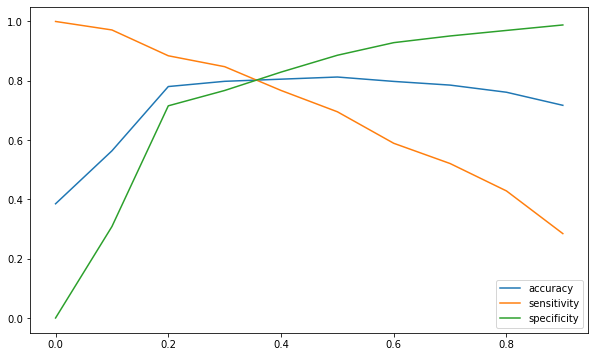

In [181]:
plt.plot(cutoff_df["prob"], cutoff_df["accuracy"], label= "accuracy")
plt.plot(cutoff_df["prob"], cutoff_df["sensitivity"], label= "sensitivity")
plt.plot(cutoff_df["prob"], cutoff_df["specificity"], label= "specificity")
plt.legend()
plt.show()

### Taking the cutoff to be 0.4

In [182]:
y_train_pred_df["pred0.4"]= y_train_pred_df["Score Probability"].map(lambda x: 1 if x>0.4 else 0)

In [183]:
y_train_pred_df.head()

,Actual Converted,Score Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,pred0.4
3009,0,0.149894,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.077122,1012,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.153630,9226,0,1,1,0,0,0,0,0,0,0,0,0
4750,1,0.885416,4750,1,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.664191,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [184]:
#Confusion matrix
final_confusion= confusion_matrix(y_train_pred_df["Actual Converted"], y_train_pred_df["pred0.4"])
final_confusion

array([[3238,  667],
       [ 569, 1877]], dtype=int64)

In [185]:
precision_score(y_train_pred_df["Actual Converted"], y_train_pred_df["pred0.4"])

0.737814465408805

In [186]:
recall_score(y_train_pred_df["Actual Converted"], y_train_pred_df["pred0.4"])

0.7673753066230581

## Making predictions on the test set 

In [187]:
y_test.describe()

count    2723.000000
mean        0.363202
std         0.481011
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

In [188]:
X_test.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.0,2723.0,...,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0
mean,0.078957,0.0,3.419758,479.489901,2.353933,0.001469,0.0,0.0,0.0,0.0,...,0.0,0.000734,0.361366,0.022769,0.036357,0.0,0.220345,0.002203,0.006243,0.0
std,0.269721,0.0,4.037991,545.761434,2.298856,0.038306,0.0,0.0,0.0,0.0,...,0.0,0.027096,0.480485,0.149194,0.187211,0.0,0.414556,0.046898,0.078781,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.0,1.000000,12.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.0,3.000000,241.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.0,5.000000,928.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,1.000000,0.0,74.000000,2272.000000,55.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [189]:
X_test.shape

(2723, 87)

In [190]:
X_test.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'How did you hear about X Education', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead S

In [191]:
scaler= StandardScaler()
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

D:\anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [192]:
X_test.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2723.000000,2723.0,2.723000e+03,2.723000e+03,2.723000e+03,2723.000000,2723.0,2723.0,2723.0,2723.0,...,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0
mean,0.078957,0.0,-3.298459e-17,8.151353e-17,3.971198e-17,0.001469,0.0,0.0,0.0,0.0,...,0.0,0.000734,0.361366,0.022769,0.036357,0.0,0.220345,0.002203,0.006243,0.0
std,0.269721,0.0,1.000184e+00,1.000184e+00,1.000184e+00,0.038306,0.0,0.0,0.0,0.0,...,0.0,0.027096,0.480485,0.149194,0.187211,0.0,0.414556,0.046898,0.078781,0.0
min,0.000000,0.0,-8.470514e-01,-8.787319e-01,-1.024147e+00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.0,-5.993580e-01,-8.567402e-01,-5.890677e-01,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.0,-1.039712e-01,-4.370659e-01,-1.539888e-01,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.0,3.914156e-01,8.219571e-01,2.810900e-01,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,1.000000,0.0,1.748226e+01,3.285024e+00,2.290519e+01,1.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [193]:
X_test_new= X_test[use_vars6]
X_test_new.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Unknown,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,-0.591008,0,0,0,0,0,1,0,0,0,0,0,0,0
1490,0,1.894051,1,0,0,0,0,0,0,1,0,0,0,0,0
7936,0,-0.743117,0,0,0,0,0,1,0,0,0,0,0,0,0
4216,0,-0.878732,0,0,0,1,0,0,1,0,0,0,0,0,0
3830,0,-0.578179,1,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
X_test_new.shape

(2723, 15)

In [195]:
X_test_new_sm= sm.add_constant(X_test_new)

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [196]:
X_train_sm.shape

(6351, 16)

In [197]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Unknown',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [198]:
X_test_new_sm.shape

(2723, 16)

In [199]:
y_test_pred= sixth_model.predict(X_test_new_sm)

In [200]:
y_test_pred.head()

3271    0.088016
1490    0.959935
7936    0.075373
4216    0.927759
3830    0.099810
dtype: float64

In [201]:
y_pred_df= pd.DataFrame(y_test_pred)

In [202]:
y_pred_df.head()

,0
3271,0.088016
1490,0.959935
7936,0.075373
4216,0.927759
3830,0.099810


In [203]:
y_test_df=pd.DataFrame(y_test)
y_test_df

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0
...,...
850,0
2879,0
6501,1
7155,0


In [204]:
y_pred_df= pd.concat([y_test_df, y_pred_df], axis= 1)
y_pred_df.head()

,Converted,0
3271,0,0.088016
1490,1,0.959935
7936,0,0.075373
4216,1,0.927759
3830,0,0.099810


In [205]:
y_pred_df["Prediction"]=y_pred_df[0].map(lambda x : 1 if x>0.4 else 0)


In [206]:
y_pred_df.head()

,Converted,0,Prediction
3271,0,0.088016,0
1490,1,0.959935,1
7936,0,0.075373,0
4216,1,0.927759,1
3830,0,0.099810,0


In [207]:
accuracy_score(y_pred_df["Converted"], y_pred_df["Prediction"])

0.7980168931325744

In [208]:
#confusion matrix for test
test_confusion= confusion_matrix(y_pred_df["Converted"], y_pred_df["Prediction"])

In [209]:
test_confusion

array([[1426,  308],
       [ 242,  747]], dtype=int64)

In [210]:
TP=test_confusion[1,1]
TN= test_confusion[0,0]
FP= test_confusion[0,1]
FN= test_confusion[1,0]

In [211]:
#senstivity
TP/(TP+FN)

0.7553083923154702

In [212]:
#specificity
TN/(TN+FP)

0.8223760092272203

So to summarise, the steps that I performed throughout the model building and model evaluation were:

Data cleaning and preparation
Handling categorical variables
Mapping categorical variables to integers
Dummy variable creation
Handling missing values
Test-train split and scaling
Model Building
Feature elimination based on correlations
Feature selection using RFE (Coarse Tuning)
Manual feature elimination (using p-values and VIFs)
Model Evaluation
Accuracy
Sensitivity and Specificity
Precision and Recall
Predictions on the test set